In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('/content/weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


/tmp/ipython-input-8-1879247785.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

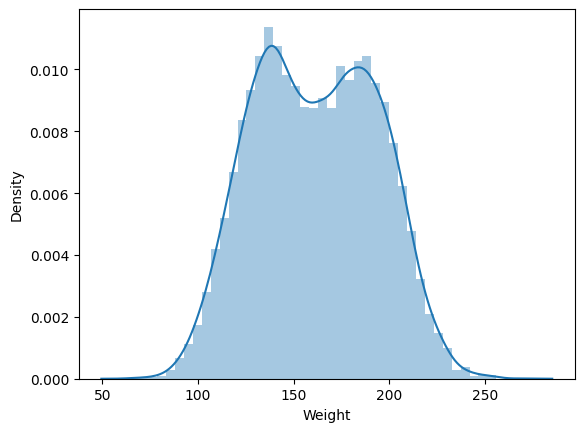

In [8]:
sb.distplot(data['Weight'])

<Axes: ylabel='Height'>

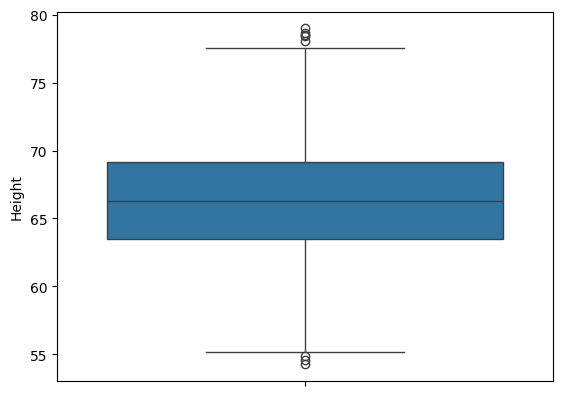

In [4]:
sb.boxplot(data['Height'])

<Axes: ylabel='Weight'>

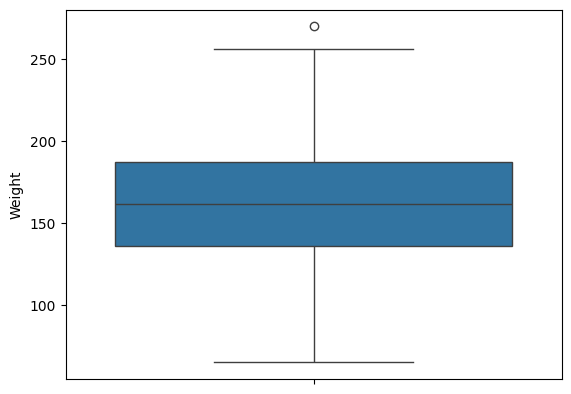

In [5]:
sb.boxplot(data['Weight'])

#**calculating the upper and lower limit of dataframe**

In [9]:
upper_limit = data['Height'].quantile(0.99)
upper_limit

np.float64(74.7857900583366)

In [10]:
lower_limit = data['Height'].quantile(0.01)
lower_limit

np.float64(58.13441158671655)

#**now we need to detect the ouliers rows form dataframe**

In [12]:
outlier_data = data[(data['Height'] > upper_limit) | (data['Height'] < lower_limit)]
outlier_data

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [14]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: ylabel='Height'>

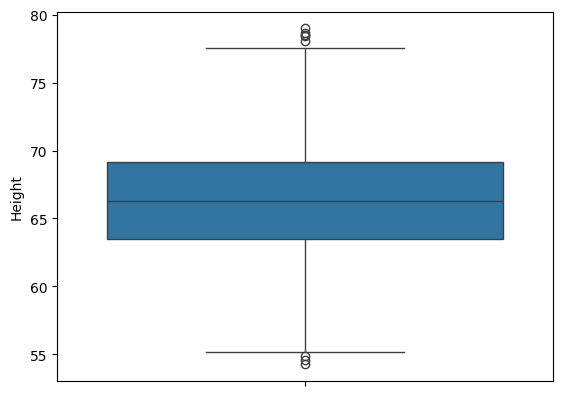

In [17]:
sb.boxplot(data['Height'])

#**now removing outlier using trimming method**

In [16]:
new_data = data[(data['Height'] < upper_limit) & (data['Height'] > lower_limit)]
new_data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: ylabel='Height'>

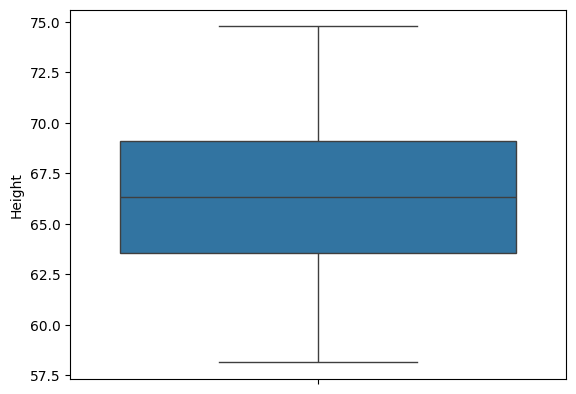

In [18]:
sb.boxplot(new_data['Height'])

#**now removing the outliers using Caping method**

In [19]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: ylabel='Height'>

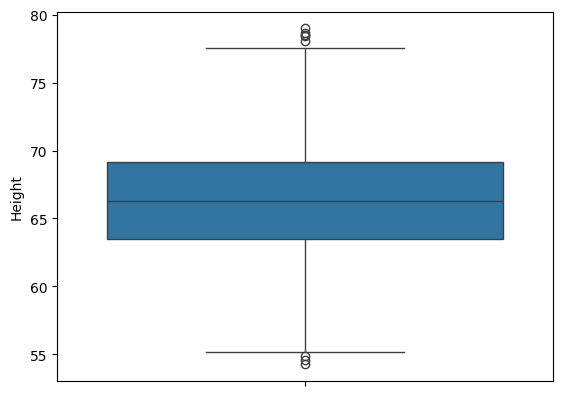

In [22]:
sb.boxplot(data['Height'])

In [20]:
new_data = data.copy()

new_data['Height'] = np.where(
    new_data['Height'] > upper_limit,
    upper_limit,
    np.where(
        new_data['Height'] < lower_limit,
        lower_limit,
        new_data['Height']
    )
)

In [21]:
new_data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: ylabel='Height'>

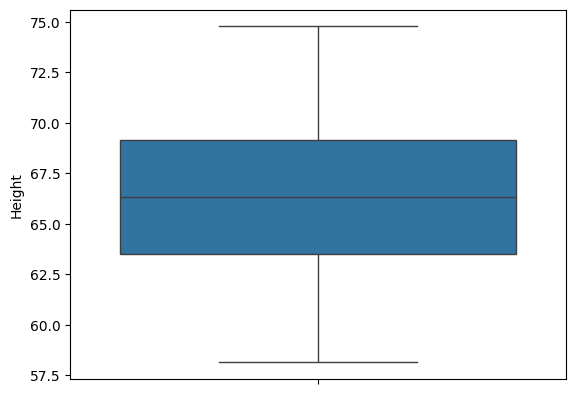

In [23]:
sb.boxplot(new_data['Height'])